In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
trips = pd.read_csv('trip.csv')
stations = pd.read_csv('station.csv')

In [112]:
weather = pd.read_csv('weather.csv')

In [12]:
#Convertir fechas a datetime

trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

# Cual es la estacion de donde salen mas viajes?

In [8]:
trips['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend at 4th)         49092
San Francisco Caltrain 2 (330 Townsend)          33742
Harry Bridges Plaza (Ferry Building)             32934
Embarcadero at Sansome                           27713
Temporary Transbay Terminal (Howard at Beale)    26089
Name: start_station_name, dtype: int64

# Como varia la cantidad de viajes segun el dia de la semana?

In [242]:
trips['day'] = trips['start_date'].dt.dayofweek

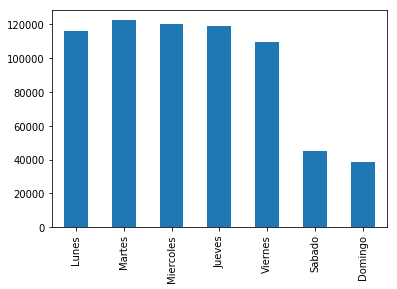

In [243]:
plt.figure()

trips_by_day_count = trips['day'].value_counts().sort_index()
trips_by_day_count.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
trips_by_day_count.plot('bar');

# Los "Customers" tienden a estar mas los fines de semana?

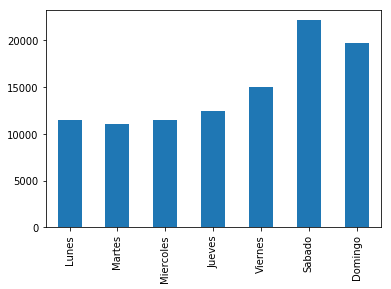

In [245]:
customers_trips_by_day = trips.loc[trips['subscription_type'] == 'Customer',['day']]['day'].value_counts().sort_index()
customers_trips_by_day.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
customers_trips_by_day.plot('bar')


# En promedio, la duracion de los viajes en la semana es constante? Las personas van al trabajo en bicicleta?

In [248]:
def getNames(seriesOfNumbers):
    names = []
    days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
    
    for numDay in seriesOfNumbers:
        names.append(days[numDay])
    return names

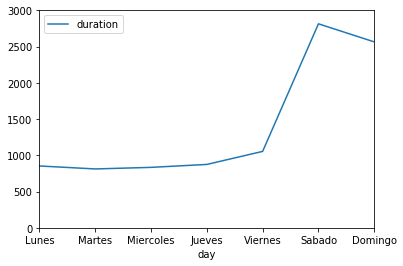

In [249]:
tripsByDayAndDuration = trips.loc[:,['day','duration']].sort_values('day')
tripsByDayAndDuration = tripsByDayAndDuration.groupby('day').mean().reset_index()
tripsByDayAndDuration['day'] = tripsByDayAndDuration[['day']].apply(lambda dates: getNames(dates))
tripsByDayAndDuration.plot('day','duration',ylim=(0,3000))         

In [ ]:
# en la semana la duracion deberia ser constante, si se concidera que las personas van al trabajo/colegio en bicicleta
# si se filtran los "costumers" dejando los suscriptos...

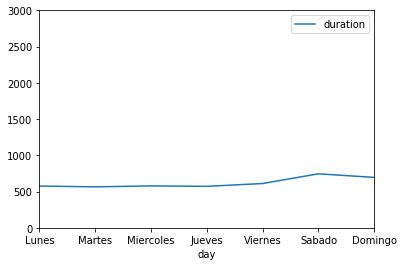

In [250]:
subscriptors_trips = trips.loc[trips.subscription_type == 'Subscriber',['day','duration']]
subscriptors_trips = suscriptors_trips.groupby('day').mean().reset_index()
subscriptors_trips['day'] = subscriptors_trips[['day']].apply(lambda dates: getNames(dates))
subscriptors_trips.plot('day','duration',ylim=(0,3000))